In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
df = pd.DataFrame(X, columns=['feature1', 'feature2']) # create DataFrame

In [3]:
df

,feature1,feature2
0,0.836857,2.136359
1,-1.413658,7.409623
2,1.155213,5.099619
3,-1.018616,7.814915
4,1.271351,1.892542
...,...,...
295,1.973698,1.579798
296,2.518342,1.391766
297,0.438990,4.535929
298,0.369479,7.791105


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
inertia = []
k_values = range (2,12)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


In [7]:
inertia

[270.3431137506444,
 191.27421726522257,
 56.02477057509951,
 49.44858538793566,
 42.64361661581211,
 36.89826153519393,
 29.491821088221283,
 28.1640807300572,
 26.375690604448035,
 25.571765376226363]

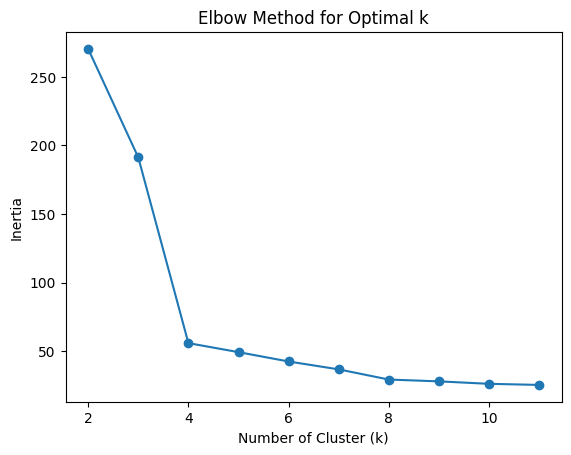

In [9]:
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

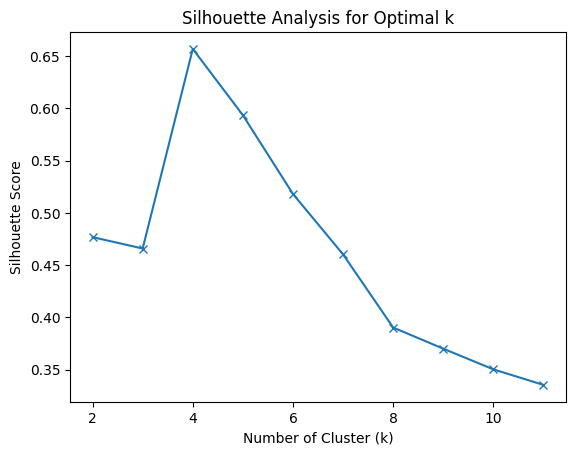

In [ ]:
# Silhouette Score - more silhoutte value, more the differentiable is cluster are.
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(k_values, silhouette_scores, marker='x')
plt.xlabel('Number of Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()

In [12]:
df

,feature1,feature2,cluster
0,0.836857,2.136359,0
1,-1.413658,7.409623,1
2,1.155213,5.099619,2
3,-1.018616,7.814915,1
4,1.271351,1.892542,0
...,...,...,...
295,1.973698,1.579798,0
296,2.518342,1.391766,0
297,0.438990,4.535929,2
298,0.369479,7.791105,1


C:\Users\Luiz_gustavo_Andrade\AppData\Roaming\Python\Python312\site-packages\matplotlib\collections.py:999: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


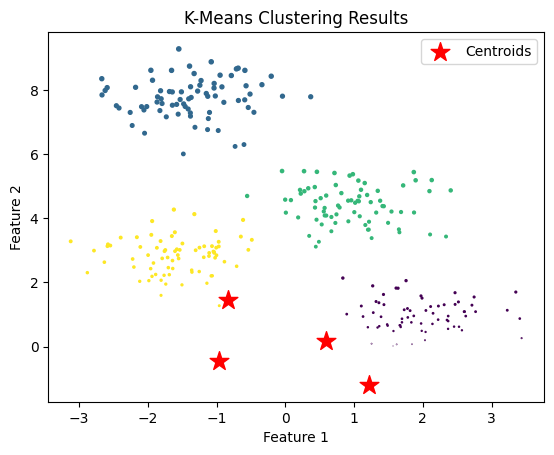

In [23]:
optimal_k = 4 # in this example, we know there are 4 true clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

#Add Cluster labels to DataFrame
df['cluster'] = kmeans.labels_

#Visualize Clusters (optional)
plt.scatter(df['feature1'], df['feature2'], df['feature2'], c=df['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='*', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

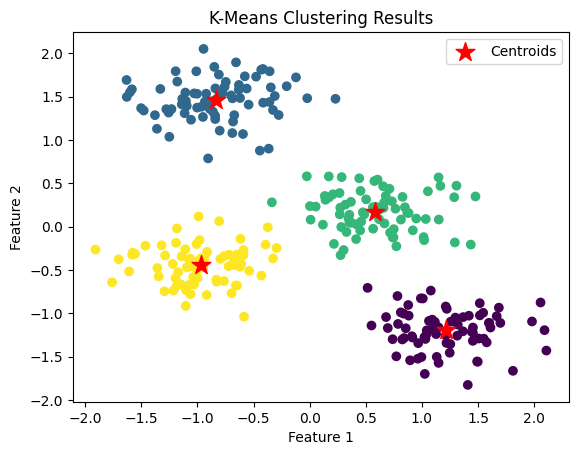

In [25]:
optimal_k = 4 # in this example, we know there are 4 true clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

#Add Cluster labels to DataFrame
df['cluster'] = kmeans.labels_

#Visualize Clusters (optional)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='*', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()